Problem #1 

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

1) Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5.
Create another 1000 samples from another independent Gaussian with mean 10 and standard
deviation 5.
(a) Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point,
and plot the histogram of the resulting 1000 points. What do you observe?
(b) Estimate the mean and the variance of the sum.

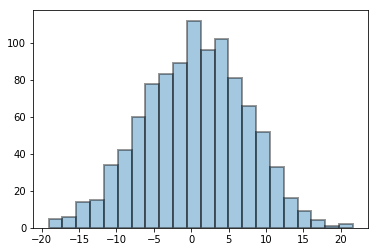

In [69]:
# take samples from the required gaussian distribution
sample1 = np.random.normal(loc=-10, scale=5, size=1000)
sample2 = np.random.normal(loc=10, scale=5, size=1000)

# sum the samples
sample_sum = sample1 + sample2

# plot histogram of sample_sum
#plt.hist(sample_sum, 100, facecolor='green', alpha=0.75)
sns.distplot(sample_sum, kde = False, hist_kws=dict(edgecolor="k", linewidth=2))

In [70]:
sample_mean = np.mean(sample_sum)
sample_var = np.sqrt(np.var(sample_sum))
print("The sample mean is: " + str(sample_mean))
print("The sample variance is: " + str(sample_var))

The sample mean is: 0.421417405838
The sample variance is: 6.85753032307


2) Central Limit Theorem. Let Xi be an iid Bernoulli random variable with value f-1,1g.
Look at the random variable Zn = 1
n
P
Xi. By taking 1000 draws from Zn, plot its histogram.
Check that for small n (say, 5-10) Zn does not look that much like a Gaussian, but when n
is bigger (already by the time n = 30 or 50) it looks much more like a Gaussian. Check also
for much bigger n: n = 250, to see that at this point, one can really see the bell curve.

In [71]:
#Sample the Bernoulli R.V.
sample_sizes = [7, 40, 250]
Z = list()
for i, s in enumerate(sample_sizes):
    new_Z = list()
    for _ in range(1000):
        sample_bern = np.random.choice([-1,1], size=s)
        sample_sum = np.sum(sample_bern)
        new_Z.append(sample_sum / s)
    Z.append(new_Z)

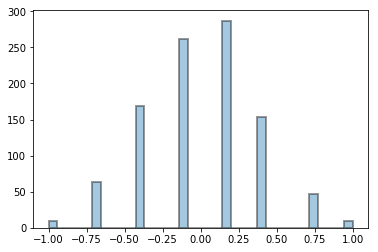

In [72]:
sns.distplot(Z[0], kde=False, hist_kws=dict(edgecolor="k", linewidth=2))

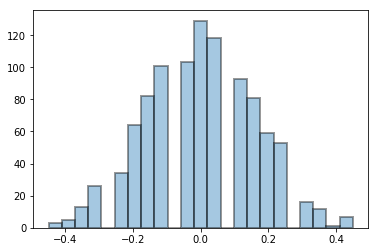

In [73]:
sns.distplot(Z[1], kde=False, hist_kws=dict(edgecolor="k", linewidth=2))

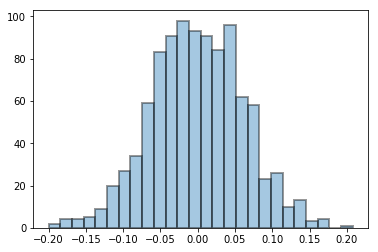

In [74]:
sns.distplot(Z[2], kde=False, hist_kws=dict(edgecolor="k", linewidth=2))

3) Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples
from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean
and standard deviation of this gaussian using elementary numpy commands, i.e., addition,
multiplication, division (do not use a command that takes data and returns the mean or
standard deviation).

In [75]:
samples = np.random.normal(loc=0, scale=5, size=25000)
sample_mean = np.sum(samples) / len(samples)
var_init = samples - sample_mean
var_square = var_init * var_init
sample_var =  np.sum(var_square) / len(samples)

print("The sample mean = " + str(sample_mean))
print("The sample variance = " + str(sample_var))

The sample mean = 0.024422750092
The sample variance = 24.7202063867


4) Estimate the mean and covariance matrix for multi-dimensional data

In [76]:
mult_mean = [-5, 5]
mult_cov = [[20, 0.8], [0.8, 30]]
mult_sample = np.random.multivariate_normal(mult_mean, mult_cov, 10000)

In [77]:
x1 = mult_sample[:,0]
x2 = mult_sample[:,1]
x1_mean = np.sum(x1) / 10000
x2_mean = np.sum(x2) / 10000
print("Dimension 1 (x1) has a mean = " + str(x1_mean))
print("Dimension 2 (x2) has a mean = " + str(x2_mean))

Dimension 1 (x1) has a mean = -4.99088945776
Dimension 2 (x2) has a mean = 4.98482421736


In [78]:
x1_init = x1 - x1_mean
x2_init = x2 - x2_mean
mult_covar = np.sum(x1_init * x2_init) / 10000
print("Covariance = " + str(mult_covar))

Covariance = 0.956524766485


5) Download from Canvas/Files the dataset PatientData.csv.
1
Each row is a patient and the last column is the condition that the patient has. Do data
exploration using Pandas and other visualization tools to understand what you can about the
dataset. For example:

In [79]:
patient_data = pd.read_csv('PatientData.csv', header=None)

In [80]:
patient_data.head(n=10)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10


In [81]:
patient_data.shape

(452, 280)

# 5a
There are 452 patients and 280 important features.

In [82]:
patient_data.iloc[:, :4].describe()

,0,1,2,3
count,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354
std,16.466631,0.497955,37.170340,16.590803
min,0.000000,0.000000,105.000000,6.000000
25%,36.000000,0.000000,160.000000,59.000000
50%,47.000000,1.000000,164.000000,68.000000
75%,58.000000,1.000000,170.000000,79.000000
max,83.000000,1.000000,780.000000,176.000000


In [83]:
display(patient_data.iloc[:, 2].sort_values())

320    105
60     110
424    119
401    120
379    120
210    124
403    127
429    130
297    130
113    132
198    133
430    138
432    140
370    146
408    148
237    149
68     150
264    150
406    150
277    150
96     150
15     150
143    150
358    150
82     150
386    152
22     153
24     153
159    153
107    153
      ... 
292    178
434    178
170    178
258    178
389    178
365    178
349    178
221    178
206    178
182    179
321    180
310    180
211    180
192    180
369    181
71     182
372    182
109    184
382    185
127    185
95     185
126    186
423    186
346    186
332    188
4      190
448    190
0      190
316    608
141    780
Name: 2, Length: 452, dtype: int64

In [84]:
display( patient_data.loc[:, 3].sort_values())

141      6
60      10
316     10
320     12
126     18
424     21
403     22
429     24
401     25
210     25
379     28
430     29
297     30
198     30
113     33
374     38
102     40
216     40
419     42
432     42
353     43
405     44
195     45
115     45
264     45
35      45
386     46
298     47
167     47
237     48
      ... 
71      90
200     90
332     91
425     93
3       94
322     94
398     94
356     94
37      94
423     95
246     95
2       95
127     95
263     95
382     95
283     95
209     95
109     96
280     97
321     97
239     98
73     100
98     104
90     104
204    105
95     105
269    106
308    110
254    124
213    176
Name: 3, Length: 452, dtype: int64

# 5b

The first coulumn I believe is age because the max value is 83 and the min is 0 which can all be viewed as ages (zero being an infant). It also makes sense that the first column is age because, in many ways, it is best way of getting a general understanding of a patient.

The second column is sex of the patient due to the values being binary.

The third column I think is height in cm with it's range of 105 to 190 being reasonable heights for a person. There are two outliers though (patients 316 and 141) which I believe are noise.

The fourth column I first thought was heart rate but it had to many patients with a low value. Instead I believe it is weight in kg.

# 5c

The code sample below replaces the unknown values

In [85]:
# Remove the unknown values and replace with the feature average
miss_val = '?' 
for col in patient_data:
    col_array = patient_data[col].values
    col_type = type(col_array[0])
    if col_type == type(''):
        array_sum = 0
        num_values = 0
        val_array = col_array[col_array != miss_val]
        val_type = type(eval(val_array[0]))
        for val in val_array:
            array_sum += eval(val)
        col_mean = array_sum / len(val_array)
        final_type = np.float64
        if val_type == type(1):
            col_mean = int(np.ceil(col_mean))
            final_type = np.int64
        else:
            col_mean = np.around(col_mean, decimal=2)
        col_array[col_array == miss_val] = str(col_mean)
        col_array = col_array.astype(final_type)
        patient_data[col] = col_array

In [86]:
print(set(patient_data.iloc[:, 279].values))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16}


# 5d

To see which feature has the most influence on the patient condition, one could make a 2d scatter plot with the sorted feature values on the x axis and condition on the y axis. Then one could see whether different ranges of the feature are good at predicting a specific condition. Due to the large number of features, looking at all the scatter plots would be time consuming. 

Another method one could try to get predictive power is get all the pairs of a feature and the condition it's supposed to predict. Count all the times a particular value of a feature is matched up with multiple conditions. The lower this number is the better the predictive power.

Using machine learning models, one could split the data into a training and test set. Then one would fit a model with the training data using a single feature. After that, one would use the model to predict the test set. The feature with the highest accuracy would have the most predictive power.

Another thing one could do is see which feature has a strong with the most amount of other features. That way knowing that feature could give a good approximation of other features.

Finally the easiest method would use the sklearn feature selection library to score and pick different features.

In [87]:
patient_data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [89]:
labels = patient_data[279].values
features = patient_data.drop(279, axis=1).values
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(features, labels)
print(fit.ranking_)

[149   1 184 183  92 192 165 195 169 200 219 198 153 208  53  87 105 178
 100 272 116 227 180 229  44 259 252  84 137 128  47 206 130 221  13 182
 235 237 120 161 189 156  80 139 158 250 177 212  23  40 113  97 117  98
  96 155 129 168 248 225 106 217 181 108 162 132  99 274 119 271 176 216
 249 147 240 188 123 121  79  95  83 241  30 261 154 223 257 125  89 118
 112 152 170 253 135 231 201  50 187  70  91  75 104 226 114 218 136  94
  71 234 211  48  77 103 144 244 172 204 256 115  49 215  93 131  59 107
  88 133 199 260 194 275 269 222 236  74  61 174 141 277  62 268 251 267
 233 266 243  73  52 134 171 273  78 179 242 175 265 276 159  69   3  25
  34 209 270   6   5  85  86   9   8 122 193 205 238  22  31  54 146  68
  27  39  46 228 246  26  18 109  56  17  19  21  20 210 254   1 138 124
 111 214 173  29  36 224 263 202 164  63 110 148  35  38 160 185 232  45
 191  72  55   2  64   1  65  12 220  37  32  66 127 151  58  42  67   4
 255  11 140  76 126  16  15 150  57 230 258  82  4

In [90]:
fit_rank = fit.ranking_
idx = np.where(fit_rank==1)
print(idx)

(array([  1, 195, 221], dtype=int64),)


# 5e

Using recursive feature elimination from the feature selection module of sklearn, the 3 features with the most predictive power correspond to columns 1, 195, and 221. To do this I followed the instructions at this link https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/.